In [ ]:
import IPython
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving 00125v.jpg to 00125v (1).jpg
Saving 00149v.jpg to 00149v (1).jpg
Saving 00153v.jpg to 00153v (1).jpg
Saving 00351v.jpg to 00351v (1).jpg
Saving 00398v.jpg to 00398v (1).jpg
Saving 01112v.jpg to 01112v (1).jpg


In [ ]:
uploaded = files.upload()

Saving 01047u.tif to 01047u.tif
Saving 01657u.tif to 01657u.tif
Saving 01861a.tif to 01861a.tif


# 3 color channels alignment using FFT and gaussian sharpen filter

In [ ]:
import time
from PIL import Image, ImageChops
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2 as cv

def crop(img):
  # get the width and height of the img and crop it
  w, h = img.shape
  img=img[int(w*0.075):int(w-w*0.075),int(h*0.075):int(h-h*0.075)]
  return img

def sharpen(img):
  #sharpen image by using gaussian filter
  #blurred_img = gaussian_filter(img, 3)
  #filter_blurred_img = gaussian_filter(blurred_img, 1)
  #alpha = 30
  #sharpened = blurred_img + alpha * (blurred_img - filter_blurred_img)

  kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
  sharpened = cv.filter2D(img, -1, kernel)
  return sharpened

def displacement(a, b):
  #sharpen input images by using gaussian filter
  a = sharpen(a)
  b = sharpen(b)

  height,width = a.shape
  dt = a.dtype # data type
  # FFT
  G_a = np.fft.fft2(a)
  G_b = np.fft.fft2(b)
  conj_b = np.ma.conjugate(G_b)
  R = G_a*conj_b
  R /= np.absolute(R)
  r = np.fft.fftshift(np.fft.ifft2(R).real)
  # Get result and Interpolation
  DY, DX = np.unravel_index(r.argmax(), r.shape)

  return round(abs(width/2 - DX)), round(abs(height/2 - DY))
  #abs(width/2-sDX), abs(height/2-sDY)

def horizontal_shift(img, n):
  return np.roll(img, n, axis=1)

def vertical_shift(img, n):
  return np.roll(img, n, axis=0)

# aligns images using horizontal and vertical shift
def align(A, d):
  return horizontal_shift(vertical_shift(A, d[1]), d[0])

def colorize(file):
  # Count the running time
  start_time = time.time()

  # Open the image and convert it to an array
  imname = file
  org_img = cv.imread
  img=cv.imread(imname)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  # Divid the height of the image array into 1/3
  height = np.floor(img.shape[0] / 3.0).astype(np.int)
  b = img[ : height]
  g = img[height : 2 * height]
  r = img[2 * height : 3 * height]

  # Crop B, G, R image from the orignial image
  blue = crop(b)
  green = crop(g)
  red = crop(r)
  
  dis_green = displacement(blue, green)
  dis_red = displacement(blue, red)

  print("dx dy of green")
  print(dis_green)
  print("dx dy of red") 
  print(dis_red)

  # Align original images relative to rescaled image displacement
  new_green = align(green, [dis_green[0], dis_green[1]])
  new_red = align(red, [dis_red[0], dis_red[1]])

  # Convert to color image
  img = (np.dstack((new_red, new_green, blue)))

  if file.split('.')[1] == 'jpg':
    img = img.astype(np.uint8)
  elif file.split('.')[1] == 'tif':
    img = (img).astype(np.uint8)

  # Crop the image to remove the black border
  img = img[int(img.shape[0]*0.05):int(img.shape[0]-img.shape[0]*0.05),int(img.shape[1]*0.05):int(img.shape[1]-img.shape[1]*0.05)]
  colorized = Image.fromarray(img)
  saveName = file.split('.')[0] + '.jpeg'
  #
  colorized.save(saveName)
  plt.figure()
  plt.imshow(colorized)

  # Print the running time
  print("Runtime: %.5s seconds" % (time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


dx dy of green
(2, 5)
dx dy of red
(1, 10)
Runtime: 0.087 seconds
dx dy of green
(2, 4)
dx dy of red
(2, 9)
Runtime: 0.072 seconds
dx dy of green
(2, 7)
dx dy of red
(4, 14)
Runtime: 0.080 seconds
dx dy of green
(0, 4)
dx dy of red
(0, 13)
Runtime: 0.092 seconds
dx dy of green
(3, 5)
dx dy of red
(4, 11)
Runtime: 0.073 seconds
dx dy of green
(0, 0)
dx dy of red
(1, 5)
Runtime: 0.079 seconds


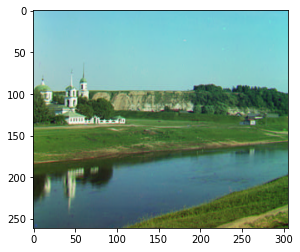

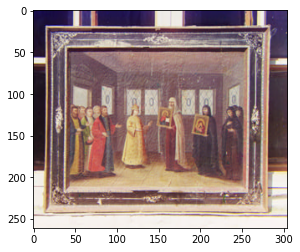

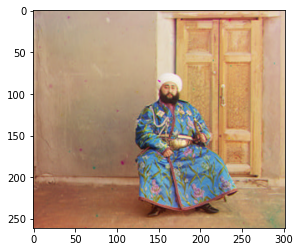

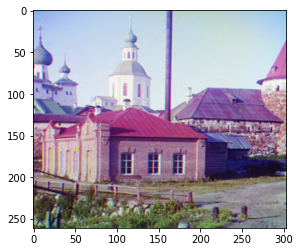

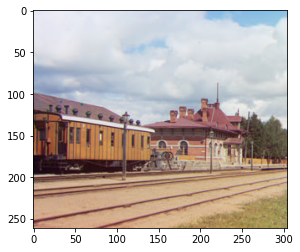

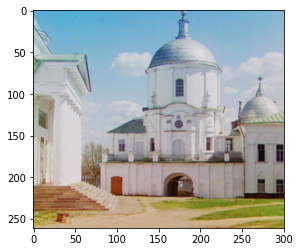

In [ ]:
file = "00125v.jpg"
colorize(file)
file = "00149v.jpg"
colorize(file)
file = "00153v.jpg"
colorize(file)
file = "00351v.jpg"
colorize(file)
file = "00398v.jpg"
colorize(file)
file = "01112v.jpg"
colorize(file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


dx dy of green
(19, 24)
dx dy of red
(32, 70)
Runtime: 7.925 seconds
dx dy of green
(9, 56)
dx dy of red
(13, 120)
Runtime: 6.852 seconds
dx dy of green
(39, 70)
dx dy of red
(63, 146)
Runtime: 6.711 seconds


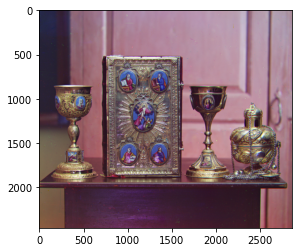

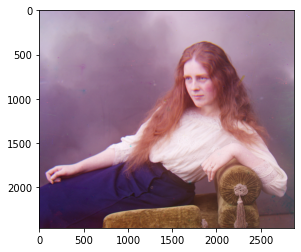

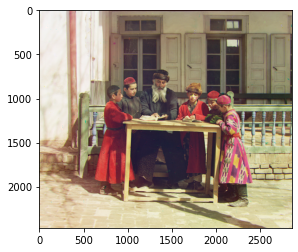

In [ ]:
file = "01047u.tif"
colorize(file)
file = "01657u.tif"
colorize(file)
file = "01861a.tif"
colorize(file)

# Plot the inverse fourier for unsharpened images

In [ ]:
def crop(img):
  # get the width and height of the img and crop it
  w, h = img.shape
  img=img[int(w*0.075):int(w-w*0.075),int(h*0.075):int(h-h*0.075)]
  return img

def inverse_fourier(a, b):
  height,width = a.shape
  dt = a.dtype # data type
  # FFT
  G_a = np.fft.fft2(a)
  G_b = np.fft.fft2(b)
  conj_b = np.ma.conjugate(G_b)
  R = G_a*conj_b
  r = np.fft.fftshift(np.fft.ifft2(R).real)
  return r

def horizontal_shift(img, n):
  return np.roll(img, n, axis=1)

def vertical_shift(img, n):
  return np.roll(img, n, axis=0)

# aligns images using horizontal and vertical shift
def align(A, d):
  return horizontal_shift(vertical_shift(A, d[1]), d[0])

def plot_unsharpen_inverse_fourier(file):
  # Open the image and convert it to an array
  imname = file
  org_img = cv.imread
  img=cv.imread(imname)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  # Divid the height of the image array into 1/3
  height = np.floor(img.shape[0] / 3.0).astype(np.int)
  b = img[ : height]
  g = img[height : 2 * height]
  r = img[2 * height : 3 * height]

  # Crop B, G, R image from the orignial image
  blue = crop(b)
  green = crop(g)
  red = crop(r)
  
  inver_b_g = inverse_fourier(blue, green)
  inver_b_r = inverse_fourier(blue, red)

  saveName = file.split('.')[0] + '_unsharpen_inver_fourier.jpeg'

  fig = plt.figure(figsize=(10, 7)) 
  fig.add_subplot(1, 2, 1)
  plt.imshow(inver_b_g)
  plt.axis('off')
  plt.title("inverse fourier of blue and green")
  fig.add_subplot(1, 2, 2)
  # showing image
  plt.imshow(inver_b_r)
  plt.axis('off')
  plt.title("inverse fourier of blue and red")
  fig.suptitle('Inverse Fourier for unsharpened images')
  plt.savefig(saveName)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


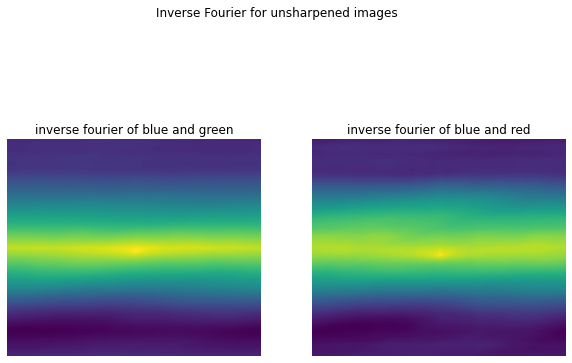

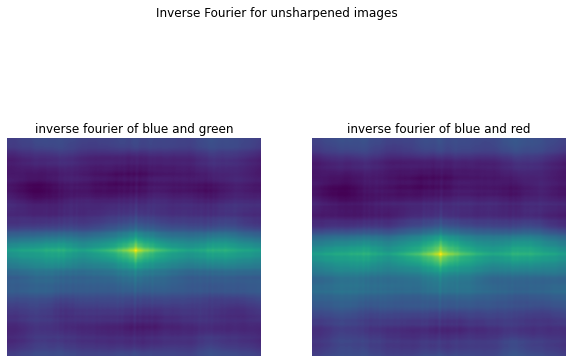

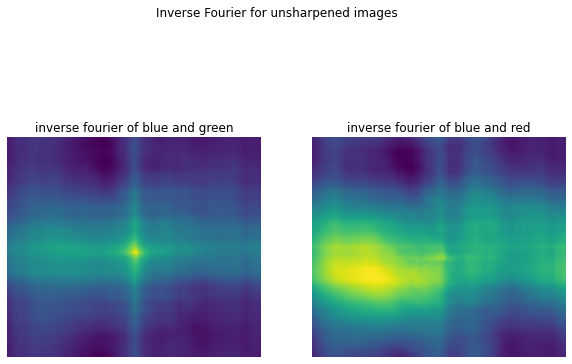

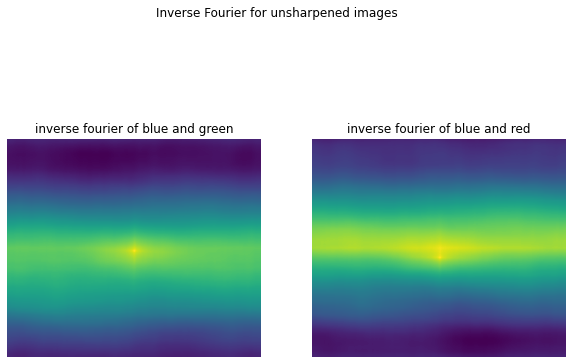

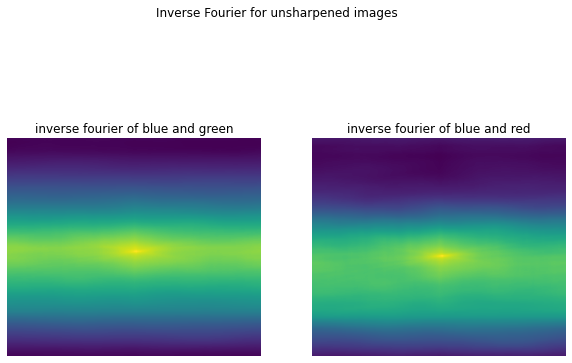

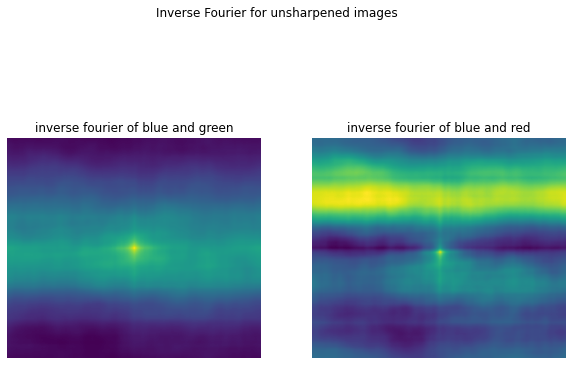

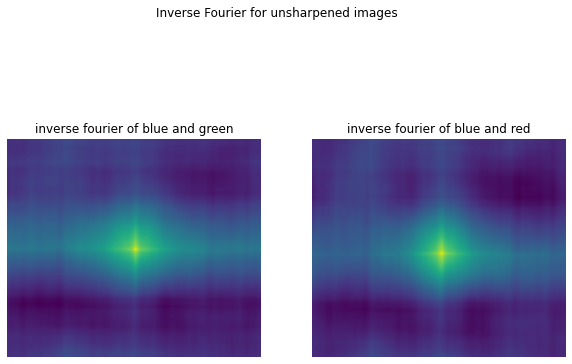

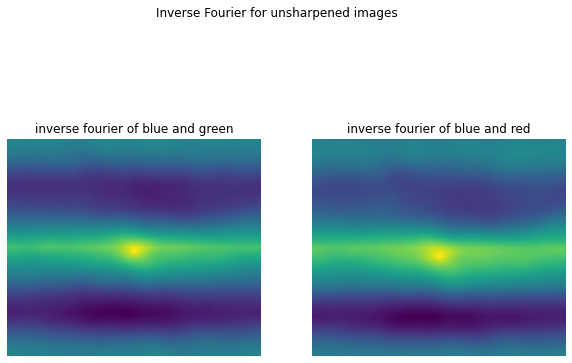

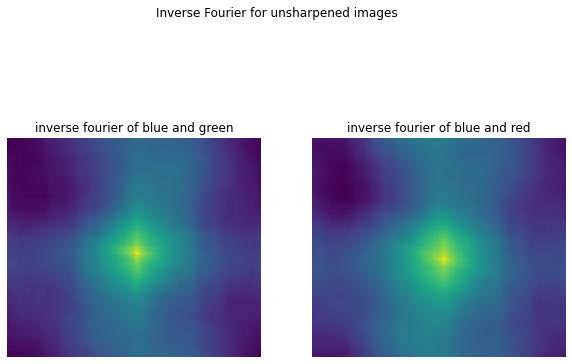

In [ ]:
file = "00125v.jpg"
plot_unsharpen_inverse_fourier(file)
file = "00149v.jpg"
plot_unsharpen_inverse_fourier(file)
file = "00153v.jpg"
plot_unsharpen_inverse_fourier(file)
file = "00351v.jpg"
plot_unsharpen_inverse_fourier(file)
file = "00398v.jpg"
plot_unsharpen_inverse_fourier(file)
file = "01112v.jpg"
plot_unsharpen_inverse_fourier(file)
file = "01047u.tif"
plot_unsharpen_inverse_fourier(file)
file = "01657u.tif"
plot_unsharpen_inverse_fourier(file)
file = "01861a.tif"
plot_unsharpen_inverse_fourier(file)

# Plot the inverse Fourier for sharpened images

In [ ]:
def crop(img):
  # get the width and height of the img and crop it
  w, h = img.shape
  img=img[int(w*0.075):int(w-w*0.075),int(h*0.075):int(h-h*0.075)]
  return img

def sharpen(img):
  #sharpen image by using gaussian filter
  #blurred_img = gaussian_filter(img, 3)
  #filter_blurred_img = gaussian_filter(blurred_img, 1)
  #alpha = 30
  #sharpened = blurred_img + alpha * (blurred_img - filter_blurred_img)

  kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
  sharpened = cv.filter2D(img, -1, kernel)
  return sharpened

def inverse_fourier(a, b):
  #sharpen input images by using gaussian filter
  a = sharpen(a)
  b = sharpen(b)

  height,width = a.shape
  dt = a.dtype # data type
  # FFT
  G_a = np.fft.fft2(a)
  G_b = np.fft.fft2(b)
  conj_b = np.ma.conjugate(G_b)
  R = G_a*conj_b
  r = np.fft.fftshift(np.fft.ifft2(R).real)
  return r

def horizontal_shift(img, n):
  return np.roll(img, n, axis=1)

def vertical_shift(img, n):
  return np.roll(img, n, axis=0)

# aligns images using horizontal and vertical shift
def align(A, d):
  return horizontal_shift(vertical_shift(A, d[1]), d[0])

def plot_sharpened_inverse_fourier(file):
  # Open the image and convert it to an array
  imname = file
  org_img = cv.imread
  img=cv.imread(imname)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  # Divid the height of the image array into 1/3
  height = np.floor(img.shape[0] / 3.0).astype(np.int)
  b = img[ : height]
  g = img[height : 2 * height]
  r = img[2 * height : 3 * height]

  # Crop B, G, R image from the orignial image
  blue = crop(b)
  green = crop(g)
  red = crop(r)
  
  inver_b_g = inverse_fourier(blue, green)
  inver_b_r = inverse_fourier(blue, red)

  saveName = file.split('.')[0] + '_sharpened_inver_fourier.jpeg'

  fig = plt.figure(figsize=(10, 7)) 
  fig.add_subplot(1, 2, 1)
  plt.imshow(inver_b_g)
  plt.axis('off')
  plt.title("inverse fourier of blue and green")
  fig.add_subplot(1, 2, 2)
  # showing image
  plt.imshow(inver_b_r)
  plt.axis('off')
  plt.title("inverse fourier of blue and red")
  fig.suptitle('Inverse Fourier for sharpened images')
  plt.savefig(saveName)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


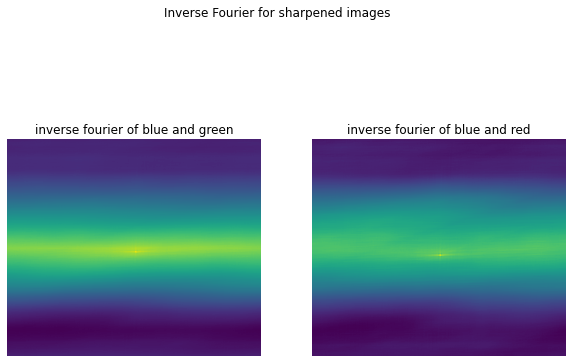

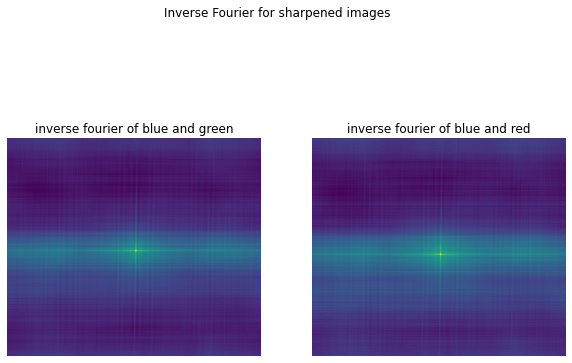

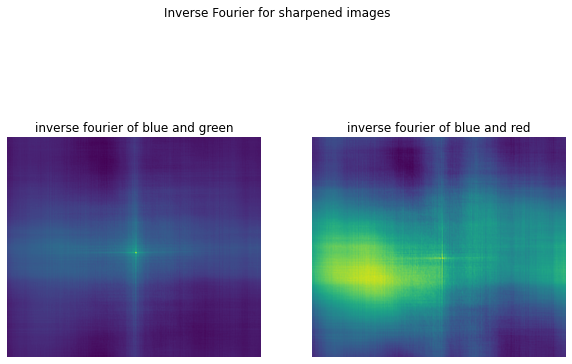

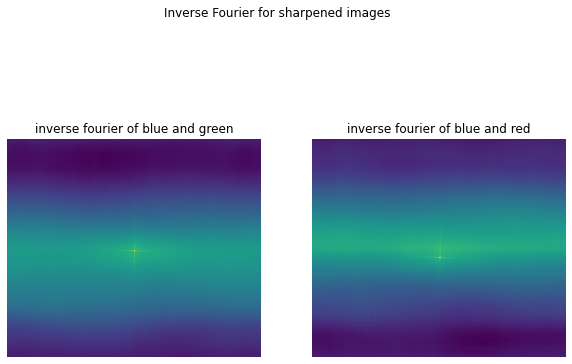

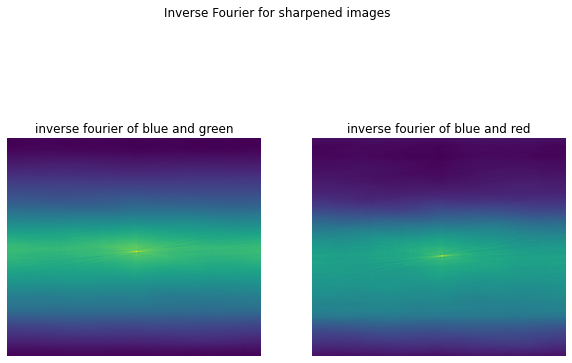

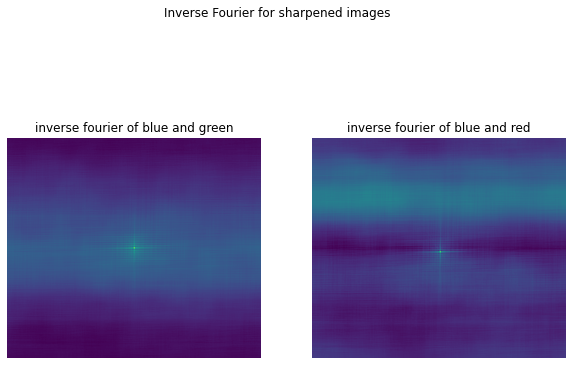

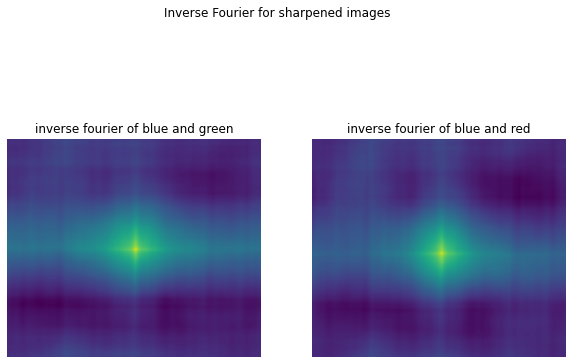

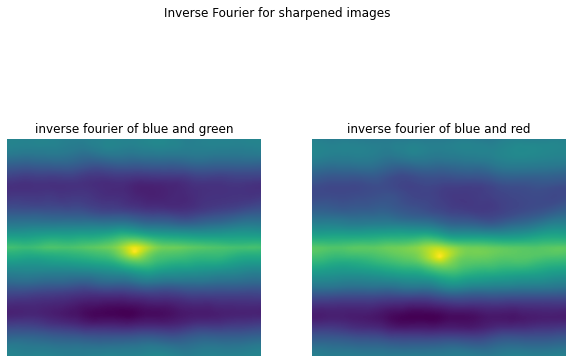

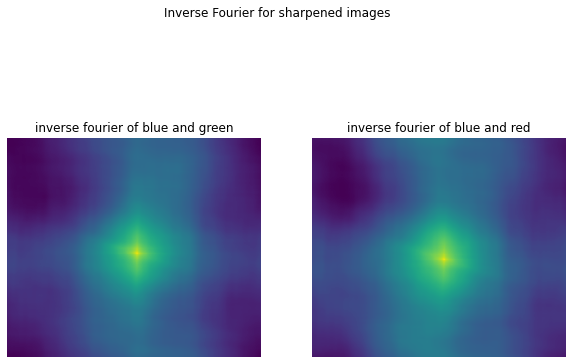

In [ ]:
file = "00125v.jpg"
plot_sharpened_inverse_fourier(file)
file = "00149v.jpg"
plot_sharpened_inverse_fourier(file)
file = "00153v.jpg"
plot_sharpened_inverse_fourier(file)
file = "00351v.jpg"
plot_sharpened_inverse_fourier(file)
file = "00398v.jpg"
plot_sharpened_inverse_fourier(file)
file = "01112v.jpg"
plot_sharpened_inverse_fourier(file)
file = "01047u.tif"
plot_sharpened_inverse_fourier(file)
file = "01657u.tif"
plot_sharpened_inverse_fourier(file)
file = "01861a.tif"
plot_sharpened_inverse_fourier(file)